In [101]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn
from scipy.fft import fft, fftfreq

In [166]:
dt = 1 / 500
N = 1000
ts = np.arange(0, dt * N, dt)
signal = (2 * np.sin(2 * np.pi * ts * 15) + 3 * np.sin(2* np.pi * ts * 100))
signal += 10 * np.random.normal(size=N)

In [167]:
fft_data = fft(signal)
fft_data = 2.0 / N * np.abs(fft_data[0:N // 2])
fft_data[0] = fft_data[0] / 2
freqs = fftfreq(N, d=dt)[0:N // 2]

In [202]:
def calc_noise_level(data, threshold):
    length = len(data)
    fft_d = fft(data)
    fft_d = 2.0 / length * np.abs(fft_d[0:length // 2])
    fft_d[0] = fft_d[0] / 2
    m = fft_d > threshold
    nl = np.mean(fft_d[~m])
    return nl

0.5582010936274765


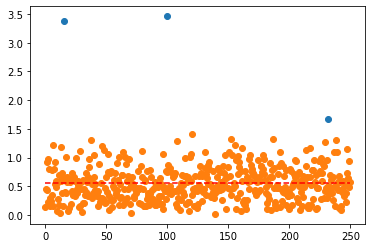

In [203]:
fig, ax = plt.subplots()
tr = 1.5
mask = fft_data > tr

ax.scatter(freqs[mask], fft_data[mask])
ax.scatter(freqs[~mask], fft_data[~mask])

noise_level = calc_noise_level(signal, 1.5)

ax.hlines(noise_level, np.min(freqs), np.max(freqs),'r', linestyles='--', label=noise_level)

print(noise_level)


In [248]:
ns = np.logspace(3,5, 10, dtype=int)
def calc_noise_level_series(noise):
    noise_levels = np.zeros_like(ns, dtype=float)
    for (i, n) in enumerate(ns):
        dt = 1 / 500
        t = np.arange(0, dt * n, dt)
        s = (1 * np.sin(2 * np.pi * t * 30))
        s += noise * np.random.normal(size=n)
        noise_levels[i] = calc_noise_level(s, 1.5)
    return noise_levels


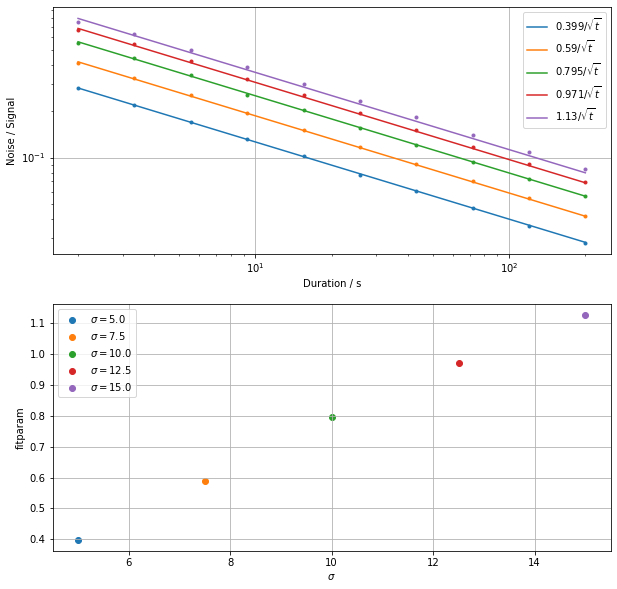

In [270]:
from scipy.optimize import curve_fit

fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10,10))

def sqrt_fit(ts, a):
    return a / np.sqrt(ts)



for noi in np.linspace(5, 15,5):
    noise_level = calc_noise_level_series(noi)
    ax.scatter(ns * dt, noise_level, marker='.')


    opt_params = curve_fit(sqrt_fit, ns *dt, noise_level, (1))
    ts_fine = np.linspace(np.min(ns) * dt, np.max(ns) * dt, 1000)
    ax.plot(ts_fine, sqrt_fit(ts_fine, opt_params[0]), label=f"${opt_params[0][0]:.3} / \\sqrt{{t}}$")
    ax2.scatter(noi, opt_params[0], label =f"$\\sigma = {noi}$")






ax.set(xlabel='Duration / s', ylabel="Noise / Signal")
ax.grid()
ax2.grid()
ax.legend()
ax2.legend()
ax2.set(xlabel="$\\sigma$", ylabel="fitparam")
ax.loglog()
fig.savefig('out/noise_level_dependent_on_measure_time')